## Problem Definition

The objective of this project is to perform **short-term multivariate time-series forecasting**
using an LSTM model to predict **future temperature** based on historical
temperature, humidity, and pressure data.


# NOAA Weather Data Exploration (Kochi, India)

This notebook explores hourly NOAA weather data from Kochi, Kerala (2020–2024).
The goal is to understand data structure, variables, time coverage, and quality
before preprocessing and LSTM modeling.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob


In [5]:
files = glob("../data/raw/noaa/kochi_*.csv")
files


['../data/raw/noaa\\kochi_2020.csv',
 '../data/raw/noaa\\kochi_2021.csv',
 '../data/raw/noaa\\kochi_2022.csv',
 '../data/raw/noaa\\kochi_2023.csv',
 '../data/raw/noaa\\kochi_2024.csv',
 '../data/raw/noaa\\kochi_2025.csv']

In [6]:
dfs = [pd.read_csv(f) for f in files]
df = pd.concat(dfs, ignore_index=True)


In [7]:
df.shape


(16492, 38)

In [8]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          16492 non-null  int64  
 1   DATE             16492 non-null  object 
 2   SOURCE           16492 non-null  int64  
 3   LATITUDE         16492 non-null  float64
 4   LONGITUDE        16492 non-null  float64
 5   ELEVATION        16492 non-null  float64
 6   NAME             16492 non-null  object 
 7   REPORT_TYPE      16492 non-null  object 
 8   CALL_SIGN        16492 non-null  int64  
 9   QUALITY_CONTROL  16492 non-null  object 
 10  WND              16492 non-null  object 
 11  CIG              16492 non-null  object 
 12  VIS              16492 non-null  object 
 13  TMP              16492 non-null  object 
 14  DEW              16492 non-null  object 
 15  SLP              16492 non-null  object 
 16  AA1              6076 non-null   object 
 17  AA2         

In [9]:
#Convert Date column
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.sort_values('DATE')


In [10]:
#Check time coverage
df['DATE'].min(), df['DATE'].max()


(Timestamp('2020-01-01 00:00:00'), Timestamp('2025-08-24 15:00:00'))

In [11]:
df[['TMP', 'SLP', 'DEW']].isnull().sum()
(df[['TMP', 'SLP', 'DEW']] == 9999).sum()


TMP    0
SLP    0
DEW    0
dtype: int64

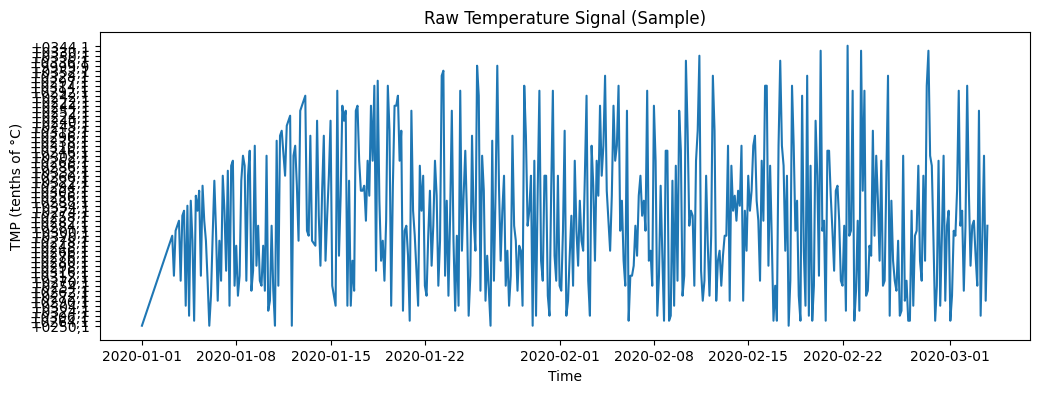

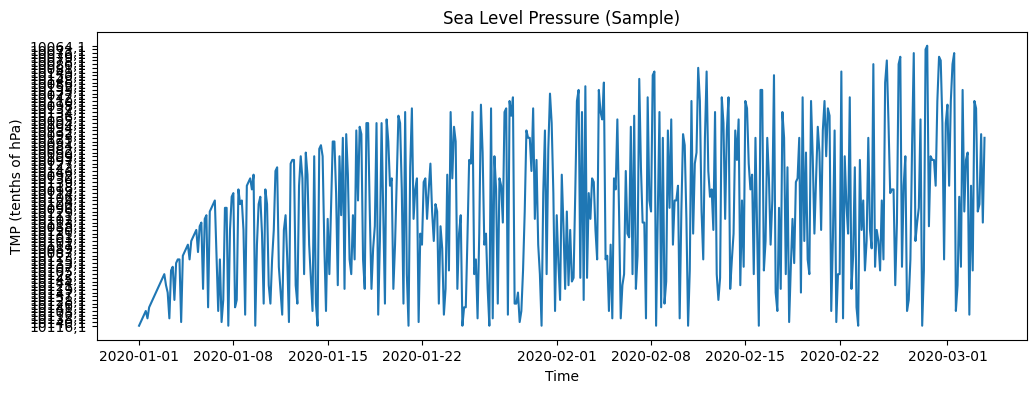

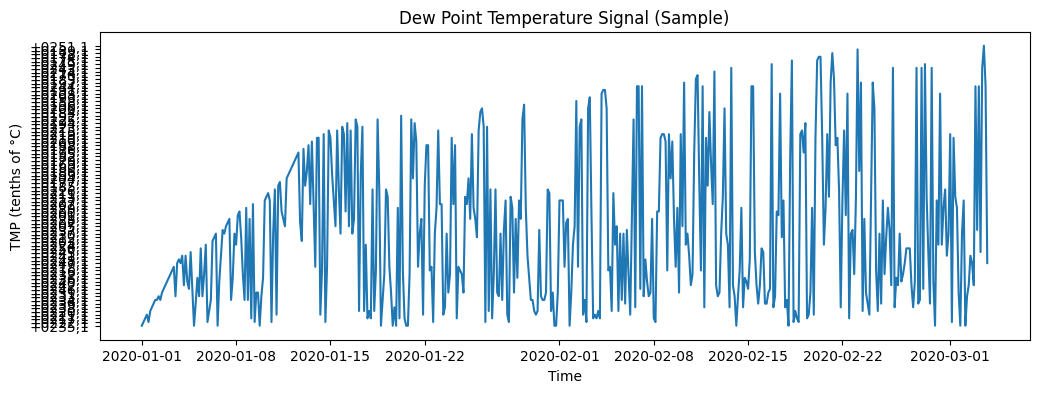

In [22]:
#Air Temperature
plt.figure(figsize=(12,4))
plt.plot(df['DATE'][:500], df['TMP'][:500])
plt.title("Raw Temperature Signal (Sample)")
plt.xlabel("Time")
plt.ylabel("TMP (tenths of °C)")
plt.show()

#Sea-level Pressure
plt.figure(figsize=(12,4))
plt.plot(df['DATE'][:500], df['SLP'][:500])
plt.title("Sea Level Pressure (Sample)")
plt.xlabel("Time")
plt.ylabel("TMP (tenths of hPa)")
plt.show()

#Dew Point Temperature
plt.figure(figsize=(12,4))
plt.plot(df['DATE'][:500], df['DEW'][:500])
plt.title("Dew Point Temperature Signal (Sample)")
plt.xlabel("Time")
plt.ylabel("TMP (tenths of °C)")
plt.show()



In [19]:
#Direct correlation check shows error
def extract_numeric(series):
    return (
        series.astype(str)
        .str.split(',', expand=True)[0]   # remove quality flag
        .astype(float)
    )
    
df_numeric = pd.DataFrame({
    'TMP': extract_numeric(df['TMP']),
    'DEW': extract_numeric(df['DEW']),
    'SLP': extract_numeric(df['SLP'])
})

df_numeric.corr()



,TMP,DEW,SLP
TMP,1.000000,0.092545,-0.007677
DEW,0.092545,1.000000,0.025929
SLP,-0.007677,0.025929,1.000000


NOAA weather variables contain quality flags embedded as strings (e.g., "+0250,1").
For exploratory correlation analysis, the numeric component was temporarily extracted.
Full cleaning and unit conversion will be handled during preprocessing.
